Importing the required libraries:

[Source](https://github.com/ejm714/disaster_relief_from_space) Ignore for now

In [1]:
# import rasterio
# import matplotlib.pyplot as plt
# import numpy as np
# import shapely
# from shapely import geometry
# from collections import Counter
# import os
# import json
# import pandas as pd
# import shapely.geometry
# import geopandas as gpd
# import geopandas_osm.osm
# import cv2
# import pickle
# from rasterio.mask import mask
# import seaborn as sns
# import random
# from rasterio.merge import merge
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# import math

# %matplotlib inline

[Source](https://github.com/DIUx-xView/data_utilities/blob/master/xView%20Processing.ipynb)

In [2]:
# Source: https://github.com/DIUx-xView/data_utilities/blob/master/xView%20Processing.ipynb
import sys
# inserting the parent directory into current path
sys.path.insert(1, '../examples/data_utilities/')



import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import geopandas as gpd
%matplotlib inline

import shapely.wkt
from rasterio.mask import mask

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)




/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/smighani/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/smighani/opt/anaconda3/envs

First, I am insertung the pre-fire training image

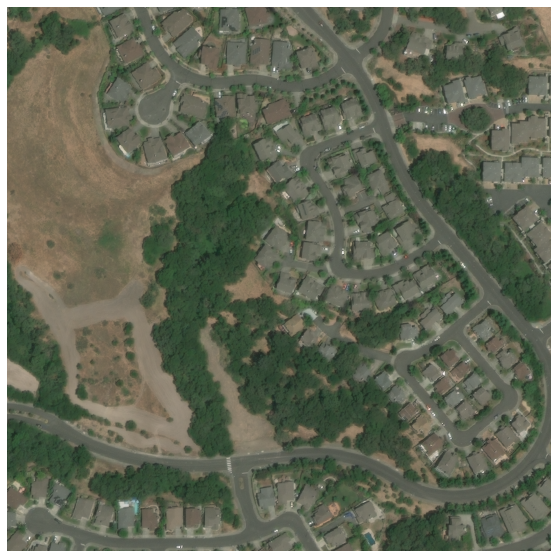

In [3]:
img_sr_pre_fire = '../datasets/train/images/santa-rosa-wildfire_00000015_pre_disaster.png'

arr = wv.get_image(img_sr_pre_fire)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(arr)

I then import the created label regions from json files:

In [4]:
labl_sr_pre_fire = '../datasets/train/labels/santa-rosa-wildfire_00000015_pre_disaster.json'

df_labl_sr_pre_fire = pd.read_json(labl_sr_pre_fire)

In [5]:
# Source: https://stackoverflow.com/questions/51855917/shapely-polygon-from-string

P = shapely.wkt.loads(df_labl_sr_pre_fire["features"]["lng_lat"][0]["wkt"])
#P = shapely.wkt.loads(df_labl_sr_pre_fire["features"]["xy"][0]["wkt"])
df_geo = gpd.GeoDataFrame()
lng_lat = []
xy = []
for i in range(len(df_labl_sr_pre_fire["features"]["lng_lat"])):
    lng_lat.append (shapely.wkt.loads(df_labl_sr_pre_fire["features"]["lng_lat"][i]["wkt"]))
    xy.append(shapely.wkt.loads(df_labl_sr_pre_fire["features"]["xy"][0]["wkt"]))
    
d = {'lng_lat': lng_lat, 'xy': xy}
df_label = pd.DataFrame(d)

df_geo["lng_lat"] = lng_lat
df_geo["xy"] = xy
df_geo.head()

,lng_lat,xy
0,POLYGON ((-122.7192751060601 38.47961788750403...,"POLYGON ((169.155738978359 0, 180.890860842111..."
1,"POLYGON ((-122.7186825126822 38.4796164658654,...","POLYGON ((169.155738978359 0, 180.890860842111..."
2,POLYGON ((-122.7184464501445 38.47960123724821...,"POLYGON ((169.155738978359 0, 180.890860842111..."
3,POLYGON ((-122.7183530116731 38.47946952110669...,"POLYGON ((169.155738978359 0, 180.890860842111..."
4,"POLYGON ((-122.7182628432876 38.4792932920713,...","POLYGON ((169.155738978359 0, 180.890860842111..."


In [6]:
g = gpd.GeoSeries(lng_lat)
g

0      POLYGON ((-122.71928 38.47962, -122.71922 38.4...
1      POLYGON ((-122.71868 38.47962, -122.71867 38.4...
2      POLYGON ((-122.71845 38.47960, -122.71849 38.4...
3      POLYGON ((-122.71835 38.47947, -122.71839 38.4...
4      POLYGON ((-122.71826 38.47929, -122.71829 38.4...
                             ...                        
118    POLYGON ((-122.71602 38.47637, -122.71617 38.4...
119    POLYGON ((-122.71770 38.47592, -122.71774 38.4...
120    POLYGON ((-122.71754 38.47603, -122.71754 38.4...
121    POLYGON ((-122.71688 38.47961, -122.71687 38.4...
122    POLYGON ((-122.71628 38.47961, -122.71628 38.4...
Length: 123, dtype: geometry

In [7]:
gpd.read_file

AttributeError: 'Polygon' object has no attribute 'plot'

In [11]:
# https://github.com/saiedmighani/disaster_relief_from_space/blob/master/notebooks/0.0-data-prep.ipynb

def polycoords(poly):
    """Convert a polygon into the format expected by OpenCV
    """
    if poly.type in ['MultiPolygon', 'GeometryCollection']:
        return [np.array(p.exterior.coords) for p in poly if p.type == 'Polygon']
    elif poly.type == 'Polygon':
        return [np.array(poly.exterior.coords)]
    else:
        print('Encountered unrecognized geometry type {}. Ignoring.'.format(poly.type))
        return []

In [ ]:
#polycoords(xy[0])

In [7]:
def crop_images(coordinates, image_dir_path, img_out_path, series):

    img_list = image_dir_path

    image_names = img_list[-45:-4]

    i = 0
    #for image in img_list:
    img_list
    geom = [{'type': 'Polygon', 'coordinates': [coordinates]}]

    with rasterio.open(image) as src:
        out_image, out_transform = mask(src, geom, crop = True)
    out_meta = src.meta.copy()

    # save the resulting raster  
    out_meta.update({"driver": "GTiff",
                    "height": out_image.shape[1],
                    "width": out_image.shape[2],
                    "transform": out_transform})

    with rasterio.open(img_out_path + image_names[i] + '_crop_' + str(series) + '.tif', "w", **out_meta) as dest:
        dest.write(out_image)  
    i +=1

In [8]:
# crop images
coords = xy

images_in = '../datasets/train/images/santa-rosa-wildfire_00000015_pre_disaster.png'
imgages_out = '../datasets/train/images/output'
crop_images(coords, images_in, imgages_out, 1)

NameError: name 'rasterio' is not defined

In [ ]:
images_in = '../datasets/train/images/santa-rosa-wildfire_00000015_pre_disaster.png'
images_in[-45:-4]

In [10]:
labl_sr_pre_fire = '../datasets/train/labels/santa-rosa-wildfire_00000015_pre_disaster.json'

df_labl_sr_pre_fire = pd.read_json(labl_sr_pre_fire)

In [11]:
df_labl_sr_pre_fire

,features,metadata
lng_lat,"[{'properties': {'feature_type': 'building', '...",NaN
xy,"[{'properties': {'feature_type': 'building', '...",NaN
sensor,NaN,GEOEYE01
provider_asset_type,NaN,GEOEYE01
gsd,NaN,1.67191
capture_date,NaN,2017-06-21T19:09:01.000Z
off_nadir_angle,NaN,5.67248
pan_resolution,NaN,0.417955
sun_azimuth,NaN,132.815
sun_elevation,NaN,69.8884


In [12]:
import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 

import numpy as np
np.random.seed(1)
import random
random.seed(1)
import pandas as pd
import cv2
import timeit
from os import path, makedirs, listdir
import sys
sys.setrecursionlimit(10000)
from multiprocessing import Pool
from skimage.morphology import square, dilation, watershed, erosion
from skimage import io

from shapely.wkt import loads
from shapely.geometry import mapping, Polygon

# import matplotlib.pyplot as plt
# import seaborn as sns

import json

In [ ]:
#https://github.com/DIUx-xView/xView2_first_place/blob/master/create_masks.py
asks_dir = 'masks'

train_dirs = ['train', 'tier3']


def mask_for_polygon(poly, im_size=(1024, 1024)):
    img_mask = np.zeros(im_size, np.uint8)
    int_coords = lambda x: np.array(x).round().astype(np.int32)
    exteriors = [int_coords(poly.exterior.coords)]
    interiors = [int_coords(pi.coords) for pi in poly.interiors]
    cv2.fillPoly(img_mask, exteriors, 1)
    cv2.fillPoly(img_mask, interiors, 0)
    return img_mask


damage_dict = {
    "no-damage": 1,
    "minor-damage": 2,
    "major-damage": 3,
    "destroyed": 4,
    "un-classified": 1 # ?
}


def process_image(json_file):
    js1 = json.load(open(json_file))
    js2 = json.load(open(json_file.replace('_pre_disaster', '_post_disaster')))

    msk = np.zeros((1024, 1024), dtype='uint8')
    msk_damage = np.zeros((1024, 1024), dtype='uint8')

    for feat in js1['features']['xy']:
        poly = loads(feat['wkt'])
        _msk = mask_for_polygon(poly)
        msk[_msk > 0] = 255

    for feat in js2['features']['xy']:
        poly = loads(feat['wkt'])
        subtype = feat['properties']['subtype']
        _msk = mask_for_polygon(poly)
        msk_damage[_msk > 0] = damage_dict[subtype]

    cv2.imwrite(json_file.replace('/labels/', '/masks/').replace('_pre_disaster.json', '_pre_disaster.png'), msk, [cv2.IMWRITE_PNG_COMPRESSION, 9])
    cv2.imwrite(json_file.replace('/labels/', '/masks/').replace('_pre_disaster.json', '_post_disaster.png'), msk_damage, [cv2.IMWRITE_PNG_COMPRESSION, 9])

https://github.com/DIUx-xView/xView1_baseline/blob/master/inference/create_detections.py